## Chapter 3: Linear Regression
### Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Improved scatter_matrix plot us
#pd.set_option('display.width', 300)
#pd.set_option('display.max_columns', 60)
#pd.set_option('display.notebook_repr_html', True)
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("poster")

In [2]:
# Load "Boston" Data from R ISLR package
#boston_df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv")
boston_df = pd.read_csv("./data/Boston.csv")
boston_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


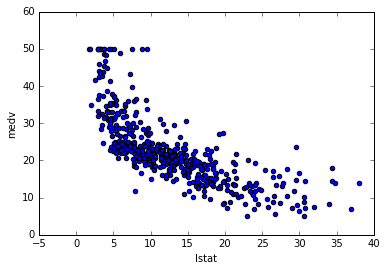

In [3]:
#ax = boston_df.plot(x="lstat", y="medv",style="o")
fig, ax = plt.subplots()
ax.scatter(boston_df["lstat"].values, boston_df["medv"].values)
ax.set_xlabel("lstat")
ax.set_ylabel("medv")

In [4]:
# statsmodels library
X = boston_df["lstat"].values
X = sm.add_constant(X) # Add the intercept term
y = boston_df["medv"].values
ols = sm.OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 29 Jul 2016   Prob (F-statistic):           5.08e-88
Time:                        18:11:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000        33.448    35.659
x1            -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Scikit Learn
lm = LinearRegression() # Create linear regression object
X = boston_df[["lstat"]].values
y = boston_df[["medv"]].values
lm.fit(X, y)
print (lm.intercept_, lm.coef_)

[ 34.55384088] [[-0.95004935]]


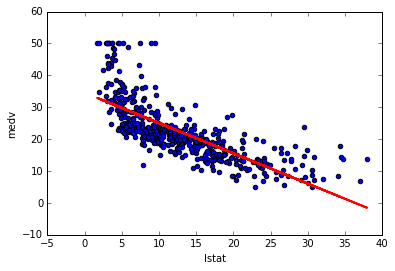

In [6]:
# Show the rgression line on top of the scatterpolt
fig, ax = plt.subplots()
ax.scatter(boston_df["lstat"].values, boston_df["medv"].values)
ax.plot(X, lm.predict(X),'r',linewidth=2) # Predicted values
ax.set_xlabel("lstat")
ax.set_ylabel("medv")

### Multiple Linear Regression

In [7]:
# Scikit Learn
lm = LinearRegression() # Create linear regression object
X = boston_df[["lstat","age"]].values
y = boston_df[["medv"]].values
lm.fit(X, y)
print (lm.intercept_, lm.coef_)

[ 33.22276053] [[-1.03206856  0.03454434]]


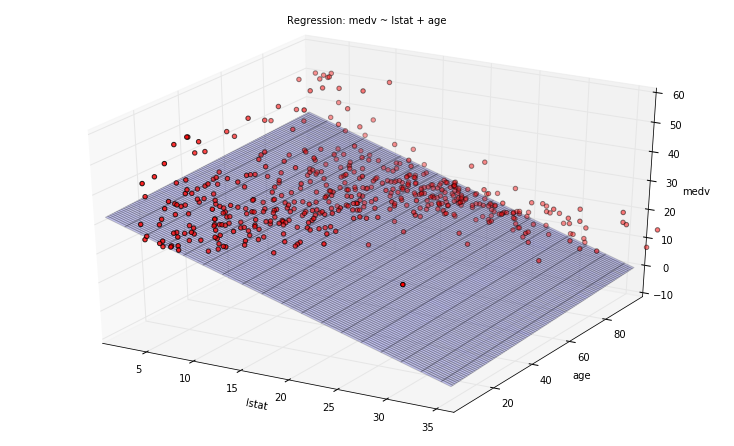

In [8]:
lstat = np.arange(int(min(boston_df["lstat"])), int(max(boston_df["lstat"])))
age = np.arange(int(min(boston_df["age"])), int(max(boston_df["age"])))
B1, B2 = np.meshgrid(lstat, age, indexing='xy')
Z = np.zeros((age.size, lstat.size))

for (i,j),v in np.ndenumerate(Z):
    #Z[i,j] = reg.predict([B1[i,j], B2[i,j]])
    temp = np.array([B1[i,j], B2[i,j]])
    Z[i,j] = lm.predict(temp.reshape(1,-1))
    
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: medv ~ lstat + age')
ax = axes3d.Axes3D(fig)
ax.plot_surface(B1, B2, Z, rstride=1, cstride=2, alpha=0.2)
ax.scatter3D(boston_df["lstat"],boston_df["age"], boston_df[["medv"]], c='r')
ax.set_xlabel('lstat')
ax.set_xlim(min(lstat), max(lstat))
ax.set_ylabel('age')
ax.set_ylim(min(age), max(age))
#ax.set_ylim(ymin=0)
ax.set_zlabel('medv');

### Nonlinear Terms and Interactions

In [9]:
# Scikit Learn
lm = LinearRegression() # Create linear regression object
X = boston_df[["lstat","age"]].values
x_new = boston_df["lstat"].values*boston_df["age"].values
X = np.column_stack((X, x_new))

y = boston_df[["medv"]].values

lm.fit(X, y)
print (lm.intercept_, lm.coef_)

[ 36.08853593] [[ -1.39211684e+00  -7.20859509e-04   4.15595185e-03]]


### Qualitative Predictors

In [10]:
carseats_df = pd.read_csv("./data/Carseats.csv")
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [11]:
# Convert non-numeric to factors (dummy variable)
carseats_df["ShelveLoc"] = pd.factorize(carseats_df["ShelveLoc"])[0]
carseats_df["Urban"] = pd.factorize(carseats_df["Urban"])[0]
carseats_df["US"] = pd.factorize(carseats_df["US"])[0]
#carseats_df.head()

# Sales ~ . + Income:Advertising + Age:Price
carseats_df["Income:Advertising"] = carseats_df["Income"]*carseats_df["Advertising"]
carseats_df["Age:Price"] = carseats_df["Age"]*carseats_df["Price"]
#carseats_df.head()

X = carseats_df.ix[:,1:]
y = carseats_df.ix[:,0] # carseats_df.ix[:,'Sales']

lm = LinearRegression()
lm.fit(X,y)
print (lm.intercept_, lm.coef_)

9.79896025114 [  9.31444689e-02   1.12250773e-02   9.63641727e-02  -3.66707035e-05
  -1.15207960e-01   5.88010011e-01  -9.71642818e-02  -3.50051887e-02
   4.46151894e-02  -2.86336562e-02   4.82821137e-04   4.34748861e-04]


In [12]:
# R has a contrasts() function that shows how factors are encoded by default. We can do 
# this manually using scikit-learn's OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

colnames = ["ShelveLoc", "Urban", "US"]
enc = OneHotEncoder()
X = carseats_df[colnames]
enc.fit(X)
X_tr = enc.transform(X).toarray()
colnos = enc.n_values_
colnames_tr = []
for (idx, colname) in enumerate(colnames):
    for i in range(0, colnos[idx]):
        colnames_tr.append(colname + "_" + str(i))
col = 0
for colname_tr in colnames_tr:
    carseats_df[colname_tr] = X_tr[:, col]
    col = col + 1
del carseats_df["ShelveLoc"]
del carseats_df["Urban"]
del carseats_df["US"]
carseats_df[colnames_tr].head()

,ShelveLoc_0,ShelveLoc_1,ShelveLoc_2,Urban_0,Urban_1,US_0,US_1
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
# Rerun linear regression.
# Notice that we get different intercept and coefficients than before
X = carseats_df.ix[:,1:]
y = carseats_df.ix[:,0] # carseats_df.ix[:,'Sales']

lm = LinearRegression()
lm.fit(X,y)
print (lm.intercept_, lm.coef_)

8.83417946312 [  9.29371187e-02   1.08939611e-02   7.02462284e-02   1.59245307e-04
  -1.00806358e-01  -5.79465902e-02  -2.08524907e-02   7.51039210e-04
   1.06759850e-04  -2.26731273e+00   2.58136347e+00  -3.14050739e-01
   7.00798618e-02  -7.00798618e-02  -7.87785716e-02   7.87785716e-02]


### Writing Functions